# **EXPLORATORY DATA ANALYSIS ON A DATASET**

**1.	Data Cleaning and Preparation:**

In [4]:
import pandas as pd
import numpy as np
#import pandas_profiling as pp


In [5]:
# Load the dataset into a DataFrame
data1 = pd.read_csv("/content/Cardiotocographic.csv")

In [6]:
data1.head(10)

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,73.0,0.5,43.0,2.4,64.000000,0.999926,2.000000
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.000000,17.0,2.1,0.0,10.4,130.000000,0.000000,1.000000
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.000000,16.0,2.1,0.0,13.4,130.000000,0.000000,1.000000
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.000000,16.0,2.4,0.0,23.0,117.000000,1.000000,1.000000
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.000000,16.0,2.4,0.0,19.9,117.000000,1.000000,1.000000
5,134.000000,0.001116,0.0,0.010493,0.009444,0.0,0.002099,26.0,5.9,0.0,0.0,150.000000,0.000000,3.000000
6,134.000000,0.001403,0.0,0.012623,0.008415,0.0,0.002805,29.0,6.3,0.0,0.0,150.000000,0.000000,-1.025988
7,122.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,83.0,0.5,6.0,15.6,69.920261,1.000000,3.000000
8,122.000000,0.038567,0.0,0.001517,0.000000,0.0,0.000000,84.0,0.5,5.0,13.6,68.000000,1.000000,3.000000
9,122.000000,0.000000,0.0,0.002967,0.000000,0.0,0.000000,86.0,0.3,6.0,10.6,68.000000,1.000000,3.000000


In [7]:
type(data1)
data1.shape

(2126, 14)

In [8]:
data1.dtypes

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

In [9]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [10]:
data1[data1.duplicated()].shape

(2, 14)

In [11]:
# Finding the duplicate rows
data1[data1.duplicated()]

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
1115,122.0,0.000000,0.0,0.000000,0.0,0.0,0.0,19.0,1.9,0.0,15.1,39.0,0.0,1.0
1458,148.0,0.004717,0.0,0.002358,0.0,0.0,0.0,40.0,0.9,0.0,10.6,35.0,0.0,1.0


In [12]:
# Deleting the duplicates
data1_cleaned1=data1.drop_duplicates()

In [13]:
data1_cleaned1.shape

(2124, 14)

In [14]:
data1_cleaned1.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

**Filling the Null Values using fillna() function:**

In [15]:
obj_columns=data1_cleaned1[['LB']]

In [16]:
obj_columns=obj_columns.fillna(obj_columns.mode().iloc[0])

In [67]:
# Renaming the columns to delete duplicate columns
obj = obj_columns.rename({'LB': 'LB_New'}, axis=1)

In [18]:
obj.isnull().sum()

LB_New    0
dtype: int64

In [19]:
data_cleaned4=pd.concat([data1_cleaned1,obj],axis=1)

In [20]:
data_cleaned4.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
LB_New       0
dtype: int64

<Axes: >

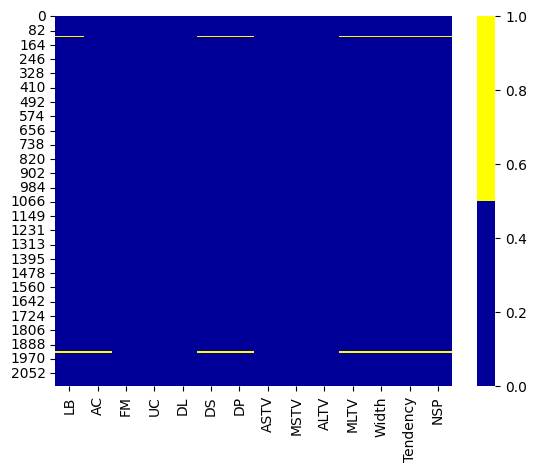

In [21]:
import seaborn as sns
cols = data1_cleaned1.columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(data1_cleaned1[cols].isnull(),
            cmap=sns.color_palette(colours))

In [22]:
obj_columns1=data1_cleaned1[['AC']]

In [23]:
obj_columns1=obj_columns1.fillna(obj_columns1.mean().iloc[0])

In [24]:
obj1 = obj_columns1.rename({'AC': 'AC_d'}, axis=1)

In [25]:
obj1.isnull().sum()

AC_d    0
dtype: int64

In [26]:
obj_columns2=data1_cleaned1[['MLTV']]

In [27]:
obj_columns2=obj_columns2.fillna(obj_columns2.mean().iloc[0])

In [28]:
obj2 = obj_columns2.rename({'MLTV': 'MLTV_New'}, axis=1)

In [29]:
obj2.isnull().sum()

MLTV_New    0
dtype: int64

In [30]:
obj_columns3=data1_cleaned1[['Width']]
obj_columns3=obj_columns3.fillna(obj_columns3.mode().iloc[0])
obj3 = obj_columns3.rename({'Width': 'Width_New'}, axis=1)
obj3.isnull().sum()

Width_New    0
dtype: int64

In [31]:
obj_columns4=data1_cleaned1[['Tendency']]
obj_columns4=obj_columns4.fillna(obj_columns4.mode().iloc[0])
obj4 = obj_columns4.rename({'Tendency': 'Tendency_New'}, axis=1)
obj4.isnull().sum()

Tendency_New    0
dtype: int64

In [32]:
obj_columns5=data1_cleaned1[['NSP']]
obj_columns5=obj_columns5.fillna(obj_columns5.mode().iloc[0])
obj5 = obj_columns5.rename({'NSP': 'NSP_New'}, axis=1)
obj5.isnull().sum()

NSP_New    0
dtype: int64

In [33]:
data_cleaned5=pd.concat([data1_cleaned1,obj,obj1,obj2,obj3,obj4,obj5],axis=1)

In [34]:
data_cleaned5.isnull().sum()

LB              21
AC              20
FM               0
UC               0
DL               0
DS              21
DP              21
ASTV             0
MSTV             0
ALTV             0
MLTV            21
Width           21
Tendency        21
NSP             21
LB_New           0
AC_d             0
MLTV_New         0
Width_New        0
Tendency_New     0
NSP_New          0
dtype: int64

**Deleting the duplicate columns using drop():**

In [35]:
data_cleaned6=data_cleaned5.drop('AC',axis=1)
data_cleaned7=data_cleaned6.drop('LB',axis=1)
data_cleaned8=data_cleaned7.drop('MLTV',axis=1)
data_cleaned9=data_cleaned8.drop('Width',axis=1)
data_cleaned10=data_cleaned9.drop('Tendency',axis=1)
data_cleaned11=data_cleaned10.drop('NSP',axis=1)

In [36]:
# DS,DP columns have 0's only mostly
data_cleaned12=data_cleaned11.drop('DS',axis=1)
data_cleaned13=data_cleaned12.drop('DP',axis=1)

In [37]:
data_cleaned13.isnull().sum()

FM              0
UC              0
DL              0
ASTV            0
MSTV            0
ALTV            0
LB_New          0
AC_d            0
MLTV_New        0
Width_New       0
Tendency_New    0
NSP_New         0
dtype: int64

**Treating Outliers:**

<Axes: >

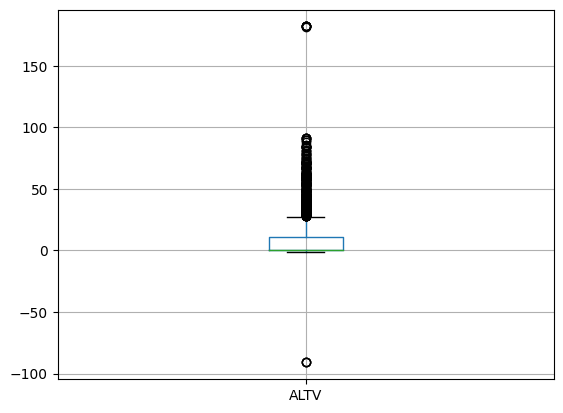

In [38]:
data_cleaned13.boxplot(column=['ALTV'])

<Axes: >

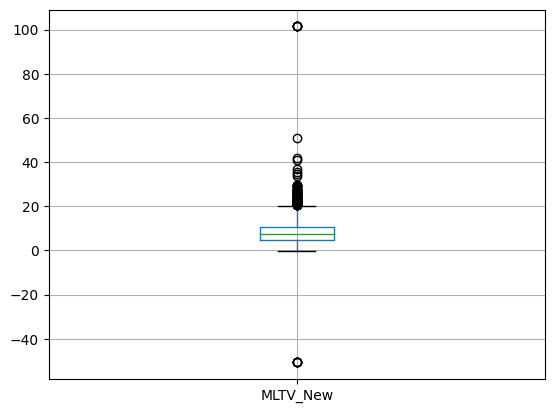

In [39]:
data_cleaned13.boxplot(column=['MLTV_New'])

In [40]:
data_cleaned13.dtypes

FM              float64
UC              float64
DL              float64
ASTV            float64
MSTV            float64
ALTV            float64
LB_New          float64
AC_d            float64
MLTV_New        float64
Width_New       float64
Tendency_New    float64
NSP_New         float64
dtype: object

In [41]:
data_cleaned13[data_cleaned13.duplicated()].shape

(2, 12)

In [42]:
data_cleaned14=data_cleaned13.drop_duplicates()

**2.	Statistical Summary:**

In [43]:
data_cleaned14['LB_New'].describe()

count    2122.000000
mean      133.332834
std        11.215284
min        51.842487
25%       126.000000
50%       133.000000
75%       140.000000
max       214.000000
Name: LB_New, dtype: float64

In [44]:
data_cleaned14[['AC_d']].describe()

,AC_d
count,2122.000000
mean,0.003223
std,0.004372
min,-0.019284
25%,0.000000
50%,0.001672
75%,0.005616
max,0.038567


In [45]:
data_cleaned14[['FM']].describe()

,FM
count,2122.000000
mean,0.009904
std,0.067602
min,-0.480634
25%,0.000000
50%,0.000000
75%,0.002567
max,0.961268


In [46]:
data_cleaned14[['UC']].describe()

,UC
count,2122.000000
mean,0.004398
std,0.003339
min,-0.014925
25%,0.001868
50%,0.004496
75%,0.006536
max,0.030002


In [47]:
data_cleaned14[['DL']].describe()

,DL
count,2122.000000
mean,0.001899
std,0.003345
min,-0.015393
25%,0.000000
50%,0.000000
75%,0.003298
max,0.030769


In [48]:
data_cleaned14[['ASTV']].describe()

,ASTV
count,2122.000000
mean,46.991735
std,18.807917
min,-63.000000
25%,32.000000
50%,49.000000
75%,61.000000
max,162.000000


In [49]:
data_cleaned14[['MSTV']].describe()

,MSTV
count,2122.000000
mean,1.365207
std,1.174301
min,-6.600000
25%,0.700000
50%,1.200000
75%,1.700000
max,13.800000


In [50]:
data_cleaned14[['ALTV']].describe()

,ALTV
count,2122.000000
mean,10.243148
std,21.153005
min,-91.000000
25%,0.000000
50%,0.000000
75%,11.000000
max,182.000000


In [51]:
data_cleaned14[['MLTV_New']].describe()

,MLTV_New
count,2122.000000
mean,8.280103
std,7.739844
min,-50.700000
25%,4.600000
50%,7.500000
75%,10.800000
max,101.400000


In [52]:
data_cleaned14[['Width_New']].describe()

,Width_New
count,2122.000000
mean,70.132231
std,42.855772
min,-174.000000
25%,37.000000
50%,67.000000
75%,100.000000
max,357.000000


In [53]:
data_cleaned14[['Tendency_New']].describe()

,Tendency_New
count,2122.000000
mean,0.312894
std,0.643374
min,-3.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,3.000000


In [54]:
data_cleaned14[['NSP_New']].describe()

,NSP_New
count,2122.000000
mean,1.300654
std,0.641433
min,-1.025988
25%,1.000000
50%,1.000000
75%,1.000000
max,5.000000


**3.	Data Visualization:**

<Axes: >

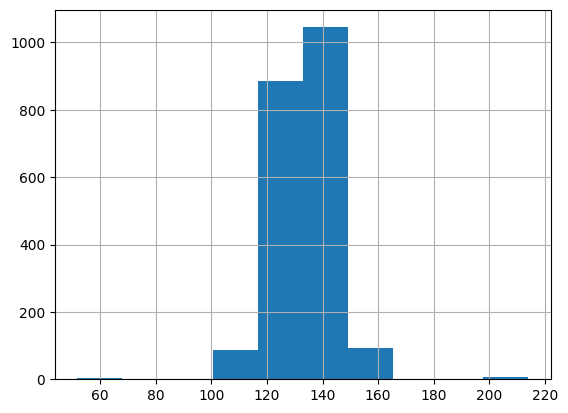

In [55]:
data_cleaned14['LB_New'].hist()

<Axes: >

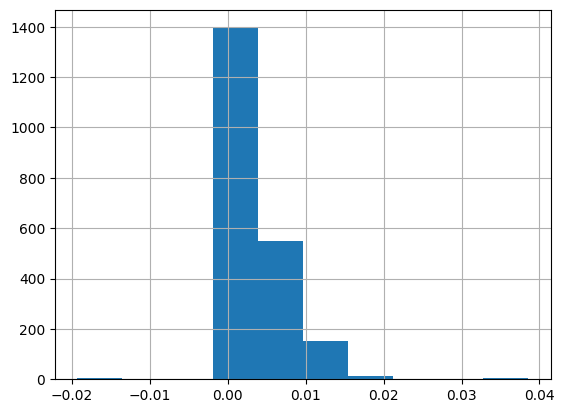

In [56]:
data_cleaned14['AC_d'].hist()

<Axes: >

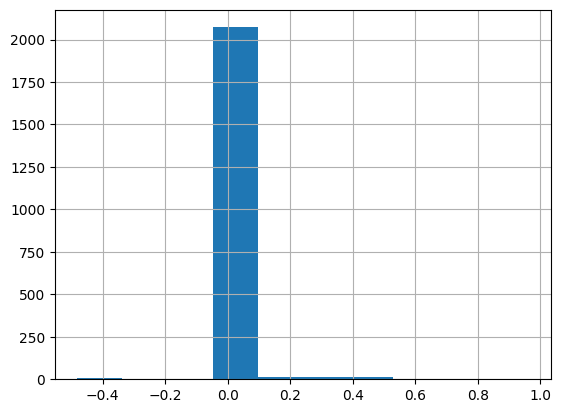

In [57]:
data_cleaned14['FM'].hist()

<Axes: >

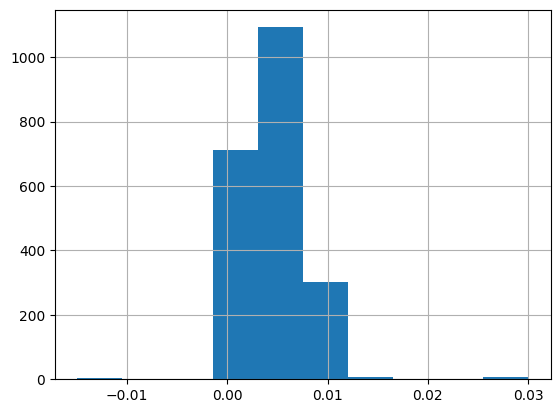

In [58]:
data_cleaned14['UC'].hist()

<Axes: >

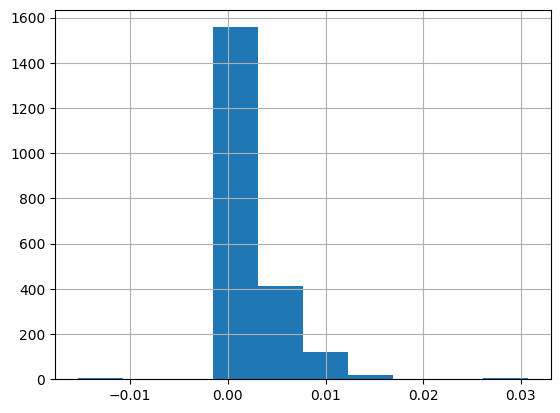

In [59]:
data_cleaned14['DL'].hist()

<Axes: >

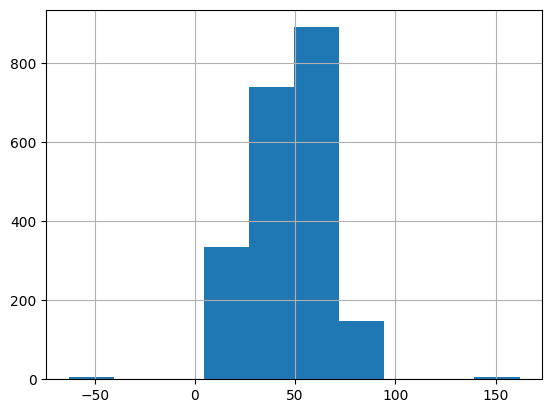

In [60]:
data_cleaned14['ASTV'].hist()

<Axes: >

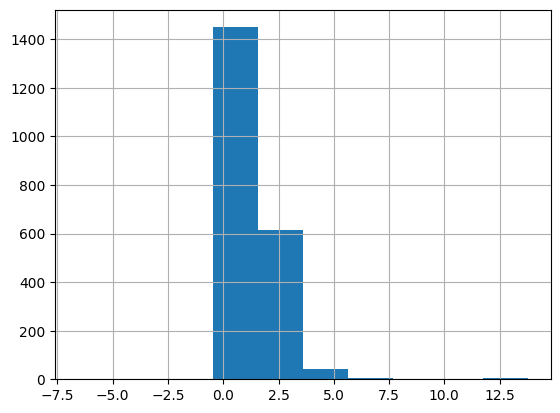

In [61]:
data_cleaned14['MSTV'].hist()

<Axes: >

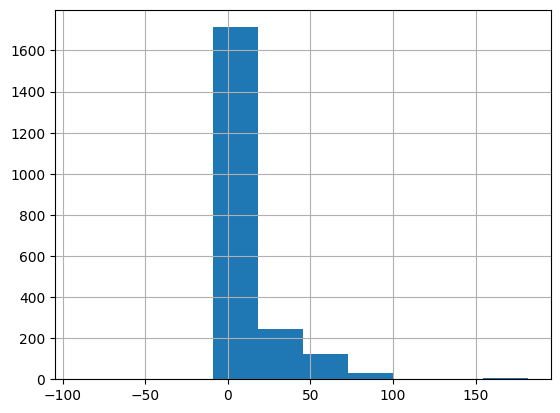

In [62]:
data_cleaned14['ALTV'].hist()

<Axes: >

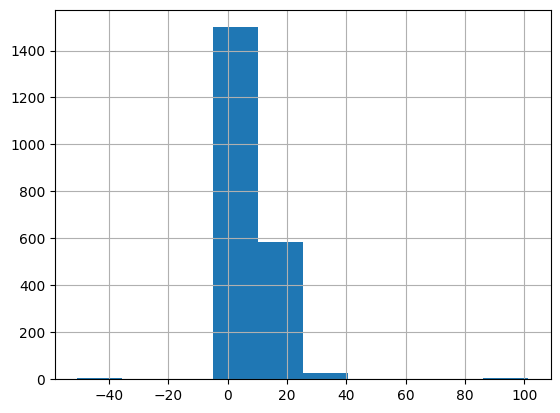

In [63]:
data_cleaned14['MLTV_New'].hist()

**Pair Plots:**

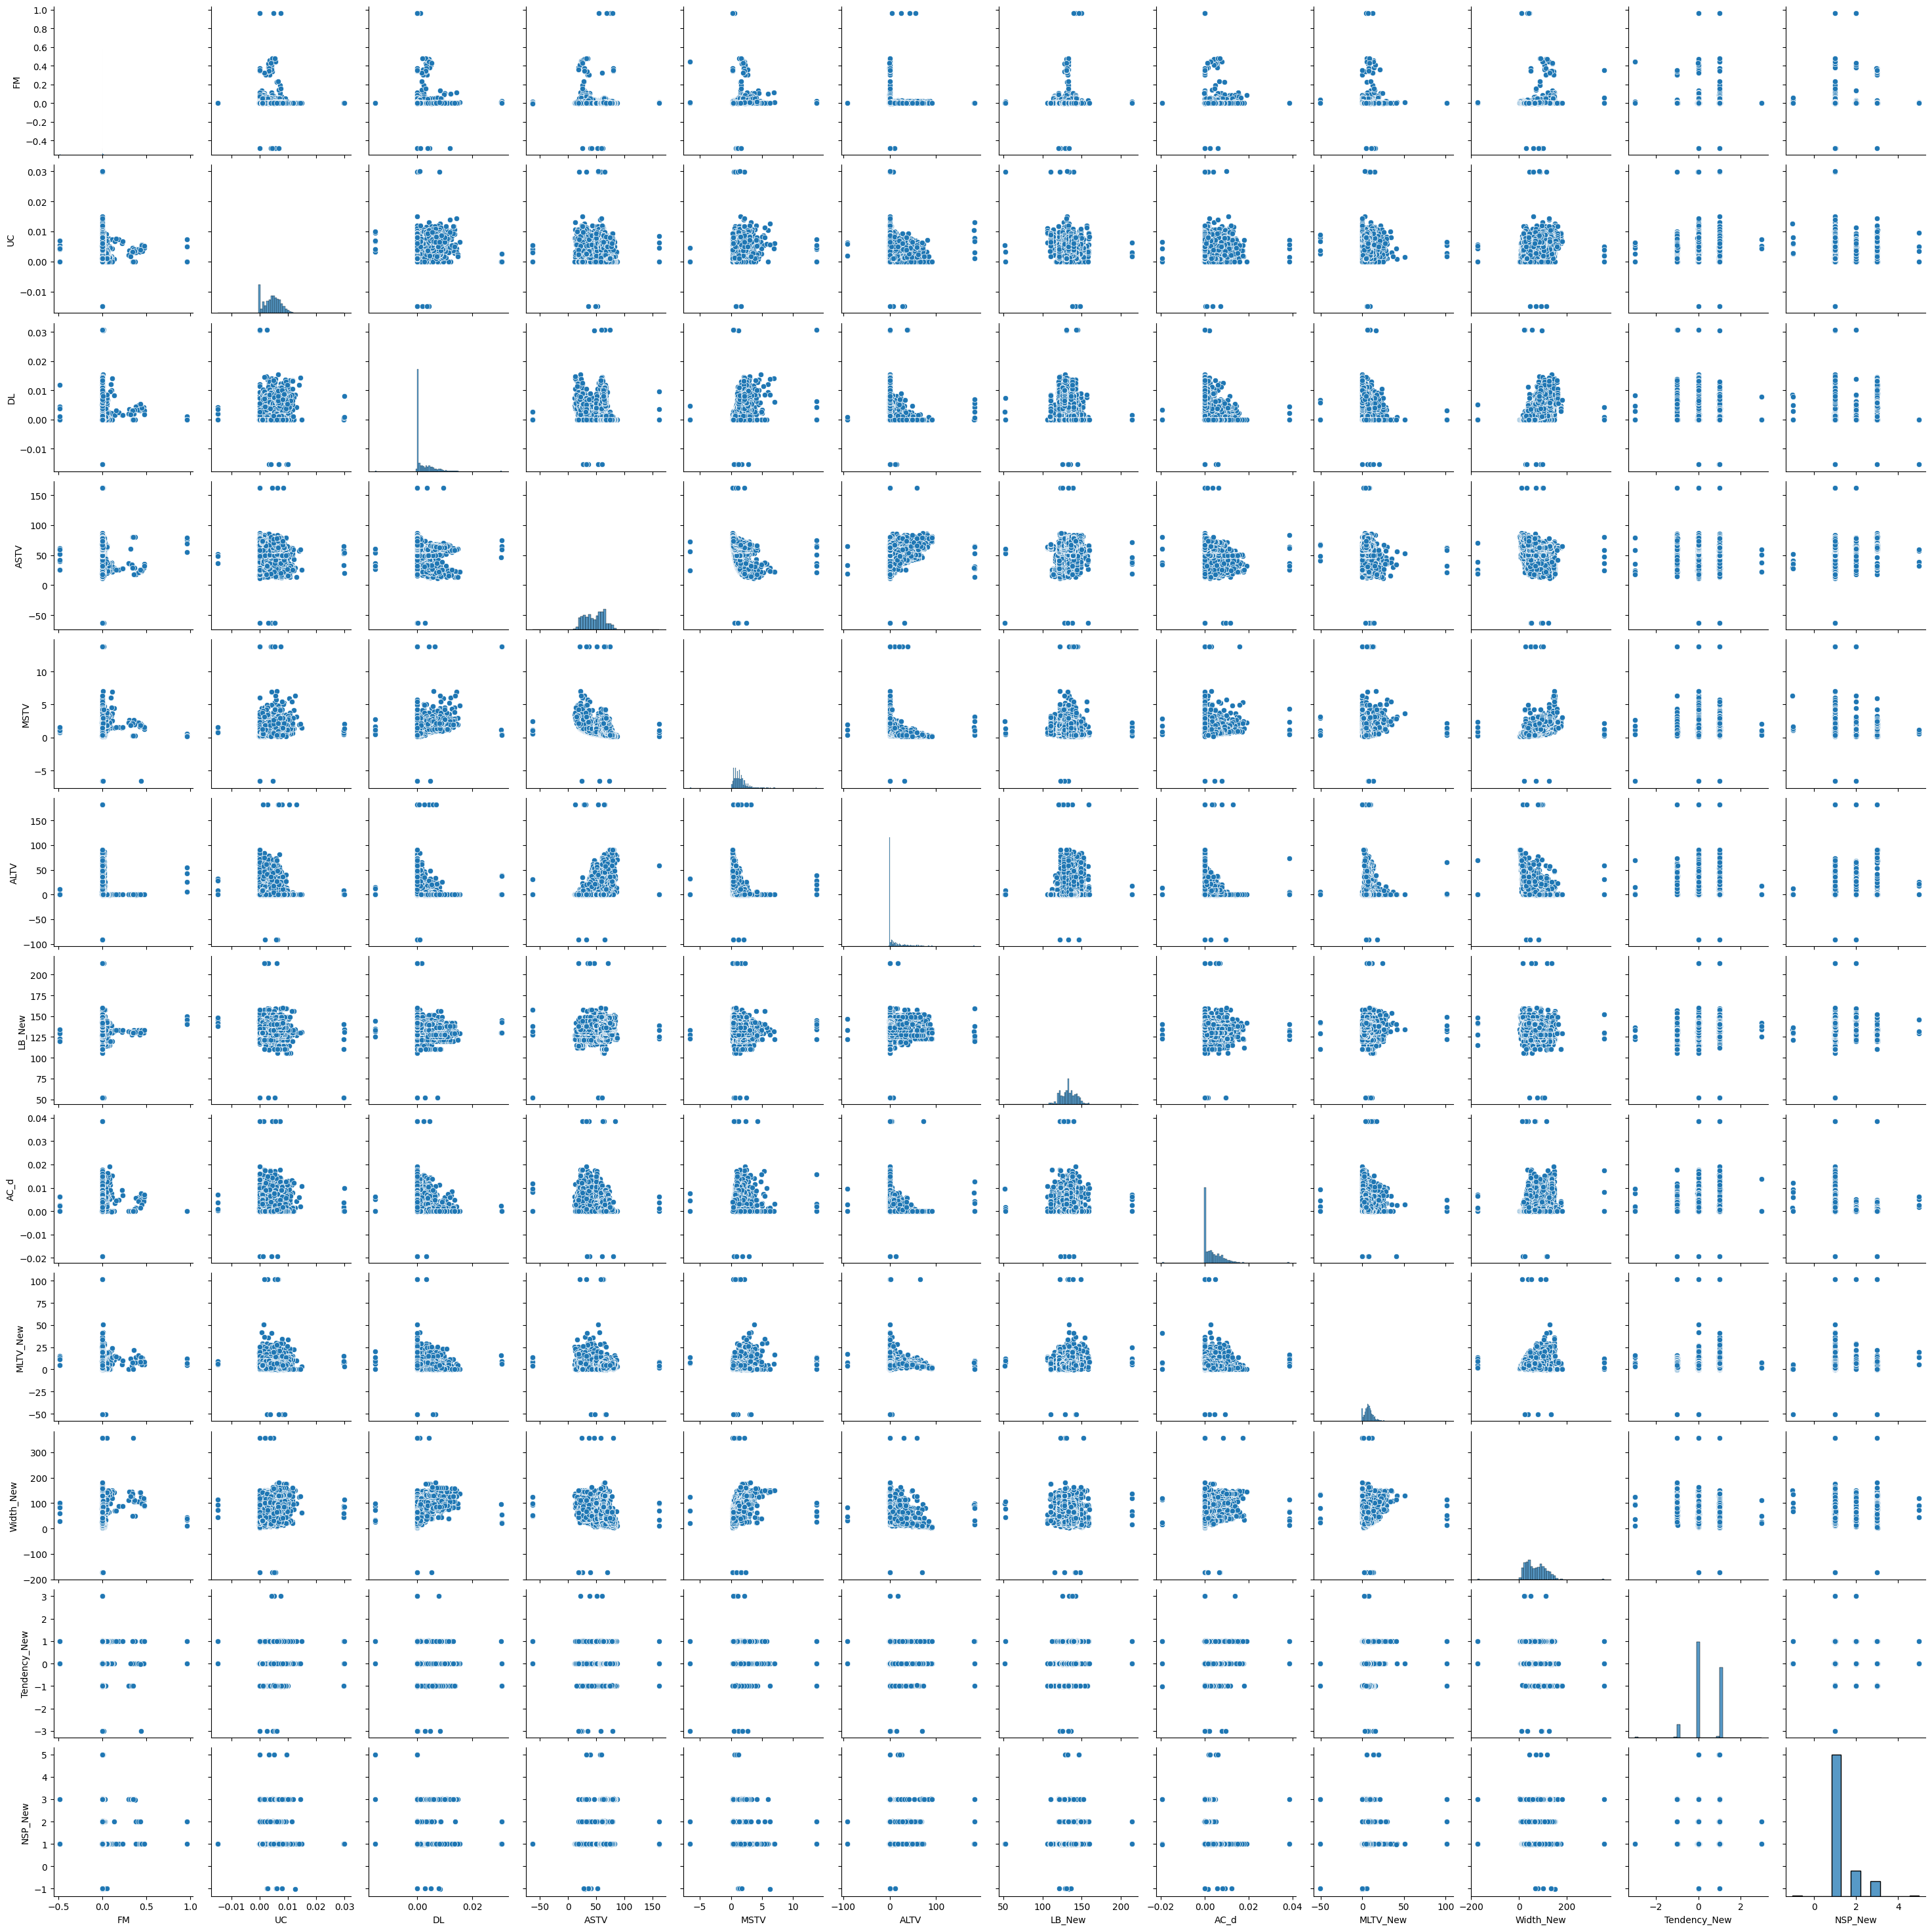

In [64]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(data_cleaned14)

**4.	Pattern Recognition and Insights:**

In [65]:
data_cleaned14.corr()

,FM,UC,DL,ASTV,MSTV,ALTV,LB_New,AC_d,MLTV_New,Width_New,Tendency_New,NSP_New
FM,1.000000,-0.053441,0.009638,-0.032900,0.017065,-0.011990,0.018797,0.009402,-0.006187,0.097651,-0.017889,0.074651
UC,-0.053441,1.000000,0.189216,-0.181206,0.188927,-0.225548,-0.166159,0.070714,-0.048720,0.106249,-0.066080,-0.183957
DL,0.009638,0.189216,1.000000,-0.069342,0.409979,-0.186510,-0.126337,-0.093762,-0.164939,0.407018,-0.023626,0.025686
ASTV,-0.032900,-0.181206,-0.069342,1.000000,-0.293239,0.355918,0.241145,-0.230469,-0.219537,-0.207775,-0.012480,0.420062
MSTV,0.017065,0.188927,0.409979,-0.293239,1.000000,-0.291099,-0.168976,0.133435,0.028716,0.430480,-0.037258,-0.094752
ALTV,-0.011990,-0.225548,-0.186510,0.355918,-0.291099,1.000000,0.210233,-0.270336,-0.107785,-0.345555,0.035513,0.363418
LB_New,0.018797,-0.166159,-0.126337,0.241145,-0.168976,0.210233,1.000000,-0.063216,-0.003347,-0.118038,0.236602,0.131614
AC_d,0.009402,0.070714,-0.093762,-0.230469,0.133435,-0.270336,-0.063216,1.000000,-0.104645,0.231692,0.030749,-0.313040
MLTV_New,-0.006187,-0.048720,-0.164939,-0.219537,0.028716,-0.107785,-0.003347,-0.104645,1.000000,0.058900,0.116538,-0.113473
Width_New,0.097651,0.106249,0.407018,-0.207775,0.430480,-0.345555,-0.118038,0.231692,0.058900,1.000000,0.083866,-0.065176


In [66]:
data_cleaned14

,FM,UC,DL,ASTV,MSTV,ALTV,LB_New,AC_d,MLTV_New,Width_New,Tendency_New,NSP_New
0,0.000000,0.000000,0.000000,73.0,0.5,43.000000,120.000000,0.000000,2.4,64.0,0.999926,2.000000
1,0.000000,0.006380,0.003190,17.0,2.1,0.000000,132.000000,0.006380,10.4,130.0,0.000000,1.000000
2,0.000000,0.008306,0.003322,16.0,2.1,0.000000,133.000000,0.003322,13.4,130.0,0.000000,1.000000
3,0.000000,0.007742,0.002561,16.0,2.4,0.000000,134.000000,0.002561,23.0,117.0,1.000000,1.000000
4,0.000000,0.008143,0.000000,16.0,2.4,0.000000,131.948232,0.006515,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2121,0.961268,0.007426,0.000000,79.0,0.2,25.000000,140.000000,0.000000,7.2,40.0,0.000000,2.000000
2122,0.000000,0.006979,0.000000,78.0,0.4,22.000000,140.000000,0.000775,7.1,66.0,1.000000,2.000000
2123,0.000000,0.006863,0.000000,79.0,0.4,20.000000,140.000000,0.000980,6.1,67.0,1.000000,1.990464
2124,0.000000,0.006110,0.000000,78.0,0.4,27.000000,140.000000,0.000679,7.0,66.0,1.000000,2.000000


**5.	Conclusion:**

Finally conducted a thorough data exploratory analysis of the "cardiographic.csv" dataset and uncovered insights, identified patterns, and understood the dataset's underlying structure by using statistical summaries, visualizations, and data manipulation techniques to explore the dataset comprehensively.
